In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing analysis data from csv
automobile_df = pd.read_csv('auto-mpg.csv')
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,49
1,15.0,8,350.0,165,3693,11.5,49
2,18.0,8,318.0,150,3436,11.0,49
3,16.0,8,304.0,150,3433,12.0,49
4,17.0,8,302.0,140,3449,10.5,49


In [3]:
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


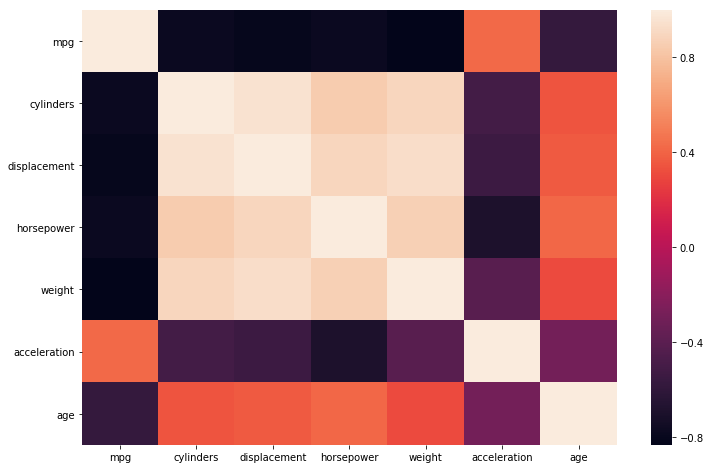

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(automobile_corr)

In [5]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
age               int64
dtype: object

In [6]:
# simple linear regression
automobile_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'age'],
      dtype='object')

In [7]:
y = automobile_df.mpg # or automobile_df['mpg']
X = automobile_df.age

In [8]:
print('Y',len(y))
print('X',len(X))

Y 392
X 392


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = automobile_df[['cylinders']]
y = automobile_df.mpg

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

lm = LinearRegression() 
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
lm.coef_

array([-3.49011652])

In [11]:
print('Training Score:',lm.score(X_train, y_train))

Training Score: 0.580526898848198


In [12]:
y_predict = lm.predict(X_test)
print(y_predict)

[28.65525335 21.67502031 14.69478728 14.69478728 14.69478728 28.65525335
 28.65525335 28.65525335 28.65525335 21.67502031 28.65525335 28.65525335
 28.65525335 28.65525335 21.67502031 21.67502031 28.65525335 14.69478728
 14.69478728 28.65525335 28.65525335 21.67502031 28.65525335 28.65525335
 28.65525335 21.67502031 28.65525335 14.69478728 25.16513683 14.69478728
 21.67502031 28.65525335 28.65525335 21.67502031 21.67502031 21.67502031
 21.67502031 28.65525335 28.65525335 28.65525335 28.65525335 14.69478728
 14.69478728 28.65525335 14.69478728 14.69478728 28.65525335 28.65525335
 14.69478728 21.67502031 28.65525335 28.65525335 28.65525335 28.65525335
 21.67502031 21.67502031 28.65525335 28.65525335 28.65525335 21.67502031
 28.65525335 21.67502031 28.65525335 14.69478728 28.65525335 21.67502031
 28.65525335 28.65525335 14.69478728 28.65525335 14.69478728 14.69478728
 14.69478728 28.65525335 14.69478728 14.69478728 28.65525335 28.65525335
 28.65525335]


In [13]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.7064830517963363

Text(0, 0.5, 'Y')

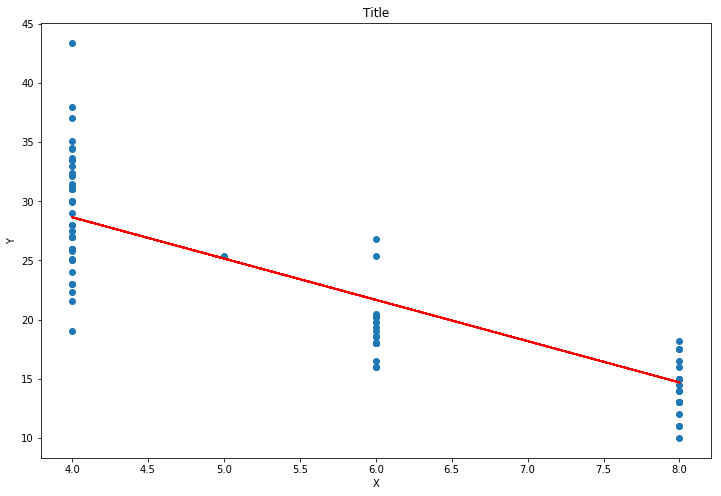

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X_test,y_test)
plt.plot(X_test, y_predict,color='r')
plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y')

In [15]:
# implementeing multiple linear regression

X = automobile_df[['cylinders','age','weight']]
y = automobile_df.mpg

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

lm = LinearRegression() 
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
type(X)

pandas.core.frame.DataFrame

In [16]:
print('Training Score:',lm.score(X_train,y_train))

Training Score: 0.8009604397728098


In [17]:
y_pred = lm.predict(X_test)
y_pred

array([18.59159859, 24.95387272, 23.76668514, 23.56249699, 33.30252738,
       12.04264341, 31.53508667, 24.95043805, 27.06342969, 20.77034491,
       23.18203916, 22.05514789, 22.23248308, 24.06494669, 30.52619245,
       29.86414108, 25.48931297, 31.64644077, 32.08977874, 28.37852031,
       22.18992028, 24.18542024, 22.95094328, 25.73318937, 31.24983205,
       30.81983474, 15.48638074, 33.95179822, 21.2428407 , 24.61845418,
       10.99197295, 23.75413102, 12.75693716, 31.86858885, 12.05694226,
       28.37604382, 13.24660633, 22.40238878, 15.44803917, 11.45056794,
        9.97125639, 32.5754531 , 26.11054626, 22.52899991, 29.949374  ,
       20.36765337, 17.71083382, 25.47996712, 14.29040745, 15.37367041,
       20.98123077, 19.59458163, 15.71843481, 23.57656943, 28.04445799,
       25.378519  , 20.56024558, 33.09467814, 13.64209479, 26.85479392,
       29.14050149, 30.77598003, 32.27398328, 17.99265376, 27.44990602,
       15.4583432 , 26.27110611, 33.86313063, 21.13092646, 27.21

In [18]:
print('Test Score:',r2_score(y_pred,y_test))

Test Score: 0.7076898490679655


In [19]:
X_train.columns
predictors = X_train.columns
predictors

Index(['cylinders', 'age', 'weight'], dtype='object')

In [20]:
lm.coef_

array([-0.27455732, -0.7236396 , -0.00591117])

In [21]:
predictors

Index(['cylinders', 'age', 'weight'], dtype='object')

In [22]:
contribution = dict(zip(predictors,lm.coef_))
contribution

{'cylinders': -0.2745573173233222,
 'age': -0.723639595888057,
 'weight': -0.005911172945461396}

In [23]:
final_pred = pd.Series(lm.coef_,predictors).sort_values()
final_pred

age         -0.723640
cylinders   -0.274557
weight      -0.005911
dtype: float64

In [24]:
pwd

'C:\\Users\\Michael\\FLASKML'

In [25]:
import pickle 
with open('/Users/Michael/FLASKML/lm.pickle', 'wb') as model_pkl:
    pickle.dump(lm, model_pkl)